# 实验二：解非线性方程

**题目：**求方程$x^3-\cos(x)-5x-1=0$的根。

记$f(x)=x^3-\cos x-5x-1$，作$f(x)$的图像。从图可以看出：方程$f(x)=0$有3个根，第一个位于$[-3,-1]$内，第二个位于$[-1,1]$内，第三个位于$[1,3]$内。

In [92]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [93]:
# 定义函数
def f0(x):
    y = x**3-np.cos(x)-5*x-1
    return y

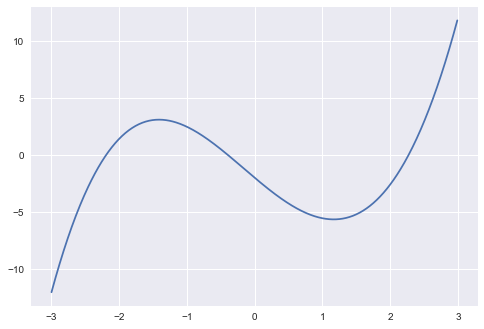

In [94]:
x_space = np.arange(-3,3,0.01)
y_space = f0(x_space)

plt.style.use("seaborn")
plt.plot(x_space, y_space)

## 1.二分法求根
二分法求根的思路是：对于连续函数$f(x)$，若其在区间$[a,b]$上满足$f(a)\cdot f(b)<0$，则其在$(a,b)$内存在零点$\bar x$。且我们可以通过二分法求出$\bar x$，其思路是：

1. 取$x_0=(a+b)/2$。若$f(x_0)=0$，则输出$x_0$。否则转到下一步。
2. 若$f(a)\cdot f(x_0)>0$，则$a_1=x_0,b_1=b$，否则$a_1=a,b_1=x_0$。
3. 重复第二步，构造$[a_1,b_1],[a_2,b_2],...$，并计算$x_k=(a_k+b_k)/2$。直至$f(x_k)=0$或$|f(x_k)|<\epsilon$停止迭代并输出$x_k$。

可以使用以下函数实现二分法：

In [95]:
# 1.对区间二分法求根
def halfsearch(f, a, b, uplimit):
    if f(a)*f(b)>=0:
        print("f(a)*f(b) should be less than 0")
        return 0
    if (a>b):
        print("a should be less than b")
        return 0
    while(b-a>uplimit):
        x0 = (a+b)/2
        if f(x0)==0:
            return x0
        elif f(x0)*f(a)>0:
            a = x0
        else:
            b = x0
    x0 = (a+b)/2
    return x0

分别在$[-3,-1],[-1,1],[1,3]$上使用二分法，所得结果如下所示：

In [97]:
#要求误差为1e-6
limit = 1e-6

print("The result between -3 and -1:", "%.6f"%halfsearch(f0,-3,-1,limit))
print("The result between -1 and 1:","%.6f"%halfsearch(f0,-1,1,limit))
print("The result between 1 and 3:","%.6f"%halfsearch(f0,1,3,limit))

The result between -3 and -1: -2.193133
The result between -1 and 1: -0.396959
The result between 1 and 3: 2.270829


## 2.不动点迭代法
对于$f(x)=0$，可以将其变换为$x=\phi(x)$。对于初值$x_0$，构造序列$x_1=\phi(x_0),x_2=\phi(x_1),...,x_k=\phi(x_{k-1}),...$。如果序列$\{x_i\}_{i=0}^\infty$收敛，则其收敛值即为方程$f(x)=0$的根。其思路是：

1. 对于$x_k$，计算$x_{k+1}=\phi(x_k)$。
2. 若$|x_{k+1}-x_k|<\epsilon$，则输出$x_{k+1}$。
3. 若迭代次数超过一定次数，停止算法，输出算法不收敛。
4. 回到第1步进行迭代。

可以使用以下函数实现不动点法：

In [98]:
def fixpoint(f, x0, uplimit):
    xold = x0
    xnew = f(xold)
    cnt = 1
    while abs(xnew-xold)>uplimit:
        xold = xnew
        xnew = f(xold)
        cnt = cnt+1
        if(cnt>10000 or abs(xnew)>1e10):
            return 0
    return (xnew,cnt)

下面对于两个不同的迭代函数进行不动点迭代法。其中$\phi_1(x)=\frac{x^3-\cos(x)-1}{5},\phi_2(x)=\sqrt[3]{\cos(x)+5x+1}$。初值取分别设置为-3,-2,-1,0,1,2,3。

**(1) $\phi_1(x)=\frac{x^3-\cos(x)-1}{5}$**

对$\phi_1(x)$使用不动点迭代法可得到如下结果：

In [102]:
def phi0(x):
    y = (x**3-np.cos(x)-1)/5
    return y

print("Fix-point Method for phi1")
for i in [-3,-2,-1,0,1,2,3]:
    if fixpoint(phi0,i,limit) == 0:
        print("初值 = %d 时不收敛"%i)
    else:
        result, itertime = fixpoint(phi0,i,limit)
        print("Start point:", i, "Result point:", "%.6f"%result, "Iterate times:", itertime)

Fix-point Method for phi1
初值 = -3 时不收敛
Start point: -2 Result point: -0.396958 Iterate times: 8
Start point: -1 Result point: -0.396958 Iterate times: 6
Start point: 0 Result point: -0.396958 Iterate times: 4
Start point: 1 Result point: -0.396958 Iterate times: 5
Start point: 2 Result point: -0.396958 Iterate times: 7
初值 = 3 时不收敛


**(2) $\phi_2(x)=\phi_2(x)=\sqrt[3]{\cos(x)+5x+1}$**

对$\phi_2(x)$使用不动点迭代法可得到如下结果：

In [103]:
def phi1(x):
    y = np.cbrt(np.cos(x)+5*x+1)
    return y

print("Fix-point Method for phi2")
for i in [-3,-2,-1,0,1,2,3]:
    if fixpoint(phi1,i,limit) == 0:
        print("初值 = %d时不收敛"%i)
    else:
        result, itertime = fixpoint(phi1,i,limit)
        print("Start point:", i, "Result point:", "%.6f"%result, "Iterate times:", itertime)

Fix-point Method for phi2
Start point: -3 Result point: -2.193133 Iterate times: 16
Start point: -2 Result point: -2.193132 Iterate times: 14
Start point: -1 Result point: -2.193132 Iterate times: 17
Start point: 0 Result point: 2.270829 Iterate times: 13
Start point: 1 Result point: 2.270829 Iterate times: 12
Start point: 2 Result point: 2.270829 Iterate times: 11
Start point: 3 Result point: 2.270829 Iterate times: 12


## 3.埃特金加速法
对于不动点迭代法中的迭代函数$\phi(x)$，不动点迭代法使用迭代公式$x_{k+1}=\phi(x_k)$。埃特金加速法使用如下的迭代公式：$y_k=\phi(x_k),z_k=\phi(y_k),x_{k+1}=x_k-\frac{(y_k-x_k)^2}{z_k-2y_k+x_k}$。

更一般的，我们将使用埃特金加速法的不动点迭代法称为斯蒂芬森迭代法。其思路如下：

1. 对于$x_k$，计算$x_{k+1}=x_k-\frac{(\phi(x_k)-x_k)^2}{\phi(\phi(x_k))-2\phi(x_k)+x_k}$。
2. 若$|x_{k+1}-x_k|<\epsilon$，则输出$x_{k+1}$。
3. 若迭代次数超过一定次数，停止算法，输出算法不收敛。
4. 回到第1步进行迭代。

可以使用如下函数实现斯蒂芬森迭代法：

In [105]:
def aitken(f, x0, uplimit):
    xnew = x0
    xold = np.inf
    cnt = 0
    while abs(xold-xnew)>uplimit:
        xold = xnew
        xk1 = f(xold)
        xk2 = f(xk1)
        xnew = xold-((xk1-xold)**2/(xk2-2*xk1+xold))
        cnt = cnt+1
        if (cnt > 10000 or abs(xnew)>1e10):
            return 0
    return (xnew,cnt)

斯蒂芬森迭代法在迭代函数$\phi_1(x)=\frac{x^3-\cos(x)-1}{6},\phi_2(x)=\sqrt[3]{\cos(x)+6x+1}$和初值-3,-2,-1,0,1,2,3下的结果为：

**(1) $\phi_1(x)=\frac{x^3-\cos(x)-1}{5}$**

对$\phi_1(x)$使用斯蒂芬森迭代法可得到如下结果：

In [106]:
print("Aitken Method for phi1")
for i in [-3,-2,-1,0,1,2,3]:
    temp = aitken(phi0,i,limit)
    if temp==0:
        print("初值 = %d时不收敛"%i)
    else:
        result, itertime = temp
        print("Start point:", i, "Result point:", "%.6f"%result, "Iterate times:", itertime)

Aitken Method for phi1
Start point: -3 Result point: -2.193133 Iterate times: 8
Start point: -2 Result point: -2.193133 Iterate times: 6
Start point: -1 Result point: -0.396958 Iterate times: 4
Start point: 0 Result point: -0.396958 Iterate times: 3
Start point: 1 Result point: -0.396958 Iterate times: 4
Start point: 2 Result point: 2.270829 Iterate times: 6
Start point: 3 Result point: 2.270829 Iterate times: 7


**(2) $\phi_2(x)=\phi_2(x)=\sqrt[3]{\cos(x)+5x+1}$**

对$\phi_2(x)$使用斯蒂芬森迭代法可得到如下结果：

In [107]:
print("Aitken Method for phi2")
for i in [-3,-2,-1,0,1,2,3]:
    temp = aitken(phi1,i,limit)
    if temp==0:
        print("初值 = %d时不收敛"%i)
    else:
        result, itertime = temp
        print("Start point:", i, "Result point:", "%.6f"%result, "Iterate times:", itertime)

Aitken Method for phi2
Start point: -3 Result point: -2.193133 Iterate times: 4
Start point: -2 Result point: -2.193133 Iterate times: 3
Start point: -1 Result point: -2.193133 Iterate times: 5
Start point: 0 Result point: 2.270829 Iterate times: 4
Start point: 1 Result point: 2.270829 Iterate times: 4
Start point: 2 Result point: 2.270829 Iterate times: 3
Start point: 3 Result point: 2.270829 Iterate times: 3


## 4.牛顿法
牛顿法对函数$f(x)$在$x_k$处做泰勒展开$f(x^*)\approx f(x_k)+f'(x_k)(x^*-x_k)$，其中$x^*$是方程$f(x)=0$的根。因此可以得到递推式$x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}$。牛顿法的思路如下：

1. 对于$x_k$，计算$x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}$。
2. 若$|x_{k+1}-x_k|<\epsilon$，则输出$x_{k+1}$。
3. 若迭代次数超过一定次数，停止算法，输出算法不收敛。
4. 回到第1步进行迭代。

牛顿法主要有两个缺点：第一、牛顿法需要计算导数$f'(x)$，计算量较大。第二、牛顿法不能保证算法的收敛性。针对这两个问题，可以分别使用简化的牛顿法和牛顿下山法对牛顿法进行改进。

简化的牛顿法：使用$f'(x_0)$代替$f'(x_k)$减少计算量。其递推式为$x_{k+1}=x_k-\frac{f(x_k)}{f'(x_0)}$。

牛顿下山法：引入压缩因子$\lambda$，将递推公式变为$x_{k+1}=x_k-\lambda\frac{f(x_k)}{f'(x_k)}$，使得$|f(x_{k+1})|<|f(x_k)|$，从而保证其收敛性。其中，$\lambda$的取值开始时为1，在每次递推中不断折半，直至满足递减的条件。牛顿下山法的思路如下：

1. 对于$x_k$，设定$\lambda=1$。
  - 1.1.计算$x_{k+1}=x_k-\lambda\frac{f(x_k)}{f'(x_k)}$。
  - 1.2.判断$|f(x_{k+1})|<|f(x_k)|$。若满足则调到第2步。
  - 1.3.$\lambda=\lambda/2$，并回到1.1步。
2. 若$|x_{k+1}-x_k|<\epsilon$，则输出$x_{k+1}$。
3. 若迭代次数超过一定次数，停止算法，输出算法不收敛。
4. 回到第1步进行迭代。

可以使用以下函数实现牛顿法及其改进方法：

**普通牛顿法** 代码：

In [108]:
def newton_phi(f, x):
    y = x-f(x)/derivative(f, x, dx=1e-6)
    return y

def newton(f, x0, uplimit):
    xold = x0
    xnew = newton_phi(f,xold)
    cnt = 1
    while abs(xnew-xold)>uplimit:
        xold = xnew
        xnew = newton_phi(f,xold)
        cnt = cnt+1
        if cnt > 10000 or abs(xnew)>1e10:
            return 0
    return (xnew,cnt)

结果如下所示：

In [110]:
print("Newton Method for f0")
for i in [-3,-2,-1,0,1,2,3]:
    temp = newton(f0,i,limit)
    if temp == 0:
        print("初值 = %d时不收敛"%i)
    else:
        result, itertime = temp
        print("Start point:", i, "Result point:", "%.6f"%result, "Iterate times:", itertime)

Newton Method for f0
Start point: -3 Result point: -2.193133 Iterate times: 6
Start point: -2 Result point: -2.193133 Iterate times: 5
Start point: -1 Result point: -0.396958 Iterate times: 4
Start point: 0 Result point: -0.396958 Iterate times: 4
Start point: 1 Result point: -2.193133 Iterate times: 7
Start point: 2 Result point: 2.270829 Iterate times: 5
Start point: 3 Result point: 2.270829 Iterate times: 5


**简化牛顿法** 代码：

In [112]:
def newton_phi_simplified(f,C,x):
    y = x-f(x)/C
    return y

def newton_simplified(f, x0, uplimit):
    xold = x0
    C = derivative(f, x0, dx=1e-6)
    xnew = newton_phi_simplified(f,C,xold)
    cnt = 1
    while abs(xnew-xold)>uplimit:
        xold = xnew
        xnew = newton_phi_simplified(f,C,xold)
        cnt = cnt+1
        if cnt > 10000 or  abs(xnew)>1e10:
            return 0
    return (xnew,cnt)

结果如下所示：

In [113]:
print("Newton Simplified Method for f0")
for i in [-3,-2,-1,0,1,2,3]:
    temp = newton_simplified(f0,i,limit)
    if temp == 0:
        print("初值 = %d时不收敛"%i)
    else:
        result, itertime = temp
        print("Start point:", i, "Result point:", "%.6f"%result, "Iterate times:", itertime)

Newton Simplified Method for f0
Start point: -3 Result point: -2.193134 Iterate times: 25
Start point: -2 Result point: -2.193133 Iterate times: 15
Start point: -1 Result point: -0.396959 Iterate times: 44
Start point: 0 Result point: -0.396958 Iterate times: 4
初值 = 1时不收敛
Start point: 2 Result point: 2.270829 Iterate times: 16
Start point: 3 Result point: 2.270830 Iterate times: 18


**牛顿下山法** 代码：

In [116]:
def newton_phi_downhill(f, x, lam):
    y = x-lam*f(x)/derivative(f, x, dx=1e-6)
    return y

def newton_downhill(f, x0, uplimit):
    xold = np.inf
    xnew = x0
    cnt = 0
    while abs(xnew-xold)>uplimit:
        xold = xnew
        lam = 1
        x_temp = newton_phi_downhill(f,xold,lam)
        while(abs(f(x_temp))>abs(f(xold))):
            lam = lam/2
            x_temp = newton_phi_downhill(f,xold,lam)     
        xnew = x_temp
        cnt = cnt+1
        if cnt > 10000 or abs(xnew)>1e10:
            return 0
    return (xnew,cnt)

结果如下所示：

In [117]:
print("Newton Downhill Method for f0")
for i in [-3,-2,-1,0,1,2,3]:
    temp = newton_downhill(f0,i,limit)
    if temp == 0:
        print("初值 = %d时不收敛"%i)
    else:
        result, itertime = temp
        print("Start point:", i, "Result point:", "%.6f"%result, "Iterate times:", itertime)

Newton Downhill Method for f0
Start point: -3 Result point: -2.193133 Iterate times: 6
Start point: -2 Result point: -2.193133 Iterate times: 5
Start point: -1 Result point: -0.396958 Iterate times: 4
Start point: 0 Result point: -0.396958 Iterate times: 4
Start point: 1 Result point: -0.396958 Iterate times: 5
Start point: 2 Result point: 2.270829 Iterate times: 5
Start point: 3 Result point: 2.270829 Iterate times: 5


## 5.埃特金加速法的收敛速度

埃特金加速法的收敛速度和不动点法的收敛速度可如下表所示。

对于迭代函数$\phi_1(x)=\frac{x^3-\cos(x)-1}{5}$，其结果为

| 初值 | 不动点法的根 | 不动点法的迭代次数 | 斯蒂芬森法的根 | 斯蒂芬森法的迭代次数 |
| :----:| :----: | :----: | :----: | :----: |
| -3 |  NaN| NaN | -2.193133 | 8 |
| -2| -0.396958 |  8| -2.193133 | 6 |
| -1 | -0.396958 | 6 |-2.193133  |4  |
| 0 | -0.396958 | 4 | 2.270829 | 3 |
| 1 | -0.396958 | 5 | 2.270829 | 4 |
| 2 |  -0.396958| 7 | 2.270829 | 6 |
| 3 | NaN | NaN | 2.270829 | 7 |

其中NaN代表不收敛，下同

对于迭代函数$\phi_2(x)=\sqrt[3]{\cos(x)+5x+1}$，其结果为

| 初值 | 不动点法的根 | 不动点法的迭代次数 | 斯蒂芬森法的根 | 斯蒂芬森法的迭代次数 |
| :----:| :----: | :----: | :----: | :----: |
| -3 | -2.193133 |  16| -2.193133 | 4 |
| -2| -2.193132 | 14 | -2.193133 | 3 |
| -1 | -2.193132 | 17 | -0.396958 |5  |
| 0 | 2.270829 | 13 |  -0.396958| 4|
| 1 | 2.270829 | 12 | -0.396958 | 4 |
| 2 |2.270829  | 11 | 2.270829 | 3 |
| 3 | 2.270829 | 12 | 2.270829 | 3 |


## 6.牛顿法的收敛速度
牛顿法的收敛速度可如下表所示。

| 初值 | 普通牛顿法(根/迭代次数) | 简化牛顿法(根/迭代次数) | 牛顿下山法(根/迭代次数) | 
| :----:| :----: | :----: | :----: |
| -3 |(-2.193133,6)  | (-2.193134,25) |(-2.193133,6)  |
| -2| (-2.193133,5) | (-2.193133,15) | (-2.193133,5) | 
| -1 |(-0.396958,4)  | (-0.396959,44) | (-0.396958,4) | 
| 0 | (-0.396958,4) | (-0.396958,4) | (-0.396958,4) |  
| 1 |(-2.193133,7)  | (NaN,NaN) | (-0.396958,5) |  
| 2 | (2.270829,5) | (2.270829,16) | (2.270829,5) |  
| 3 | (2.270829,5) | (2.270830,18) | (2.270829,5) |  